In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [4]:
#Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.
df = pd.read_csv(r"C:\Users\acer\Desktop\data_analysis\fcc-forum-pageviews.csv", parse_dates=['date'], index_col='date')
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [6]:
#show dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [8]:
#Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
#here,& is AND, to calculate percentile, we use quantile() function so it filters 2.5% and btoom 2.5%(100-2.5%) wala sab
df= df[(df['value']>df['value'].quantile(0.025)) & (df['value']<df['value'].quantile(0.975))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


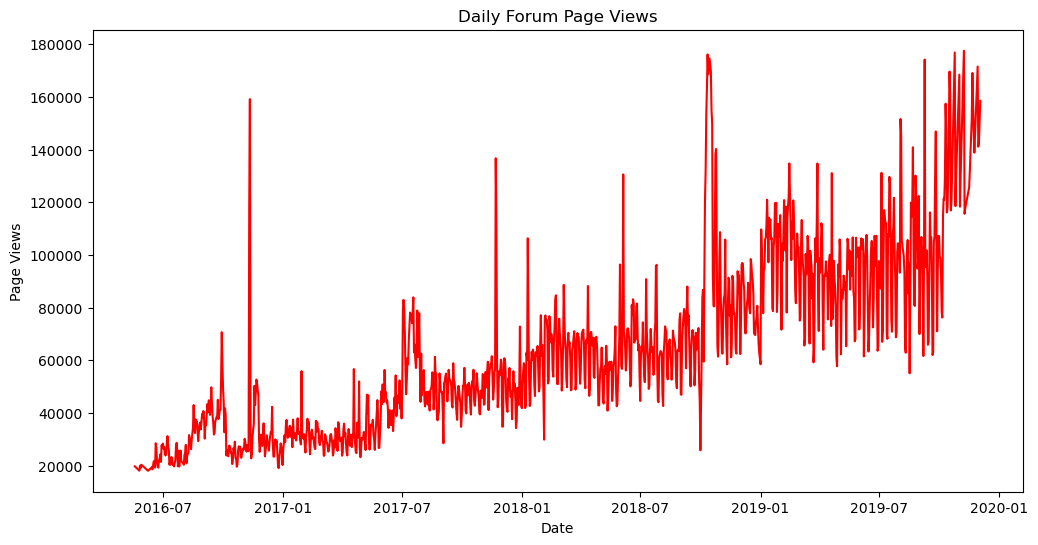

In [10]:
#darw a line plot using MAtplotlib where The label on the x axis should be Date and the label on the y axis should be Page Views.

plt.figure(figsize=(12,6))

plt.plot(df.index,df['value'],color='red')
plt.title('Daily Forum Page Views')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.show()


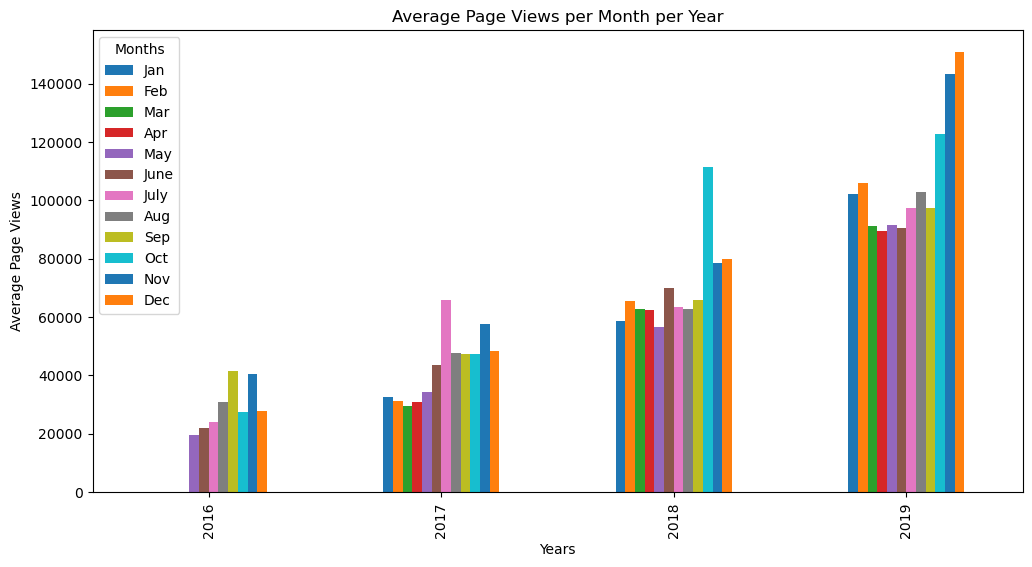

In [12]:
#barchart It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.
#we created copy of df and used .year and .month to take year and month from the index i.e date
df_bar= df.copy()
df_bar['year']= df_bar.index.year
df_bar['month']= df_bar.index.month
#unstack() function in Pandas is used to pivot the level of a MultiIndex (i.e., the rows) into columns. It essentially reshapes the DataFrame by moving one of the levels of the index to columns, which can make the data more suitable for certain types of analysis or visualization.
df_bar= df_bar.groupby(['year','month'])['value'].mean().unstack()
df_bar

#since,df_bar instead of plt is because df_bar contains the grouped and aggregated data that you want to plot, and Pandas' .plot() method is directly designed to plot that data from a DataFrame.
#used pandas to plot whereas matplot to add customziation sicne df_bar contained grp and agg datas.
df_bar.plot(kind='bar',figsize=(12,6))
plt.legend(title='Months',labels=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'])
plt.title('Average Page Views per Month per Year')  
plt.xlabel('Years') 
plt.ylabel('Average Page Views')
plt.show()


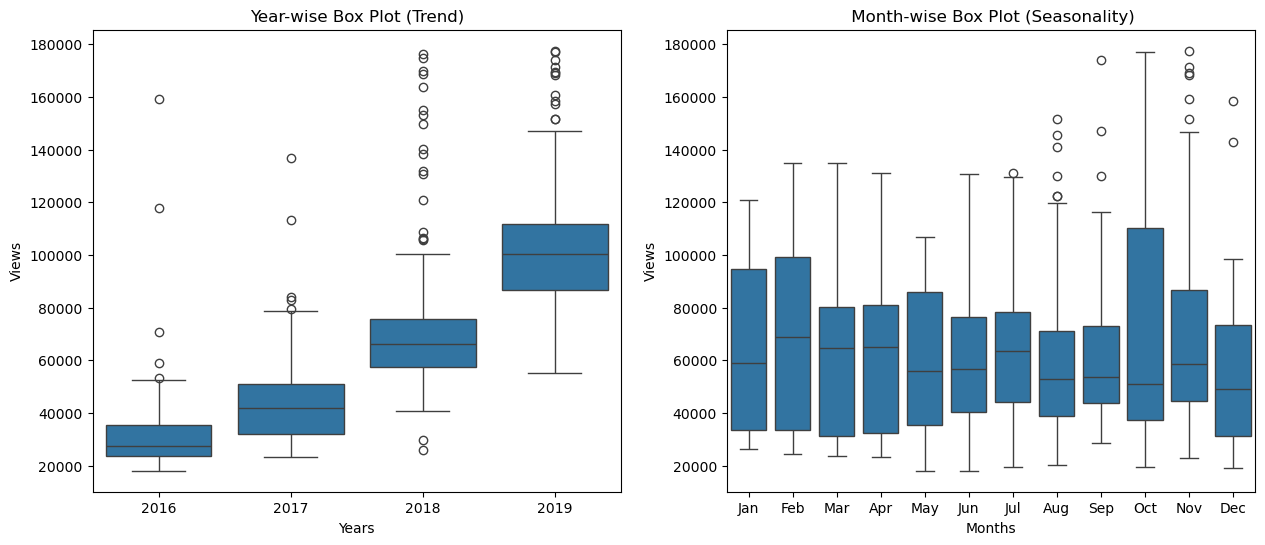

In [14]:
#2 box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.
df_box = df.copy()
df_box['year']= df_box.index.year
##strftime('%b')--> instead of month number, yesal chai month ko short name dincha,if we use %B insetad,full month name dincha
df_box['month']=df_box.index.strftime('%b')
df_box

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(data=df_box, x='year',y='value')
plt.title('Year-wise Box Plot (Trend)')
plt.xlabel('Years')
plt.ylabel('Views')

plt.subplot(1,2,2)
#since,month's order are according to alphabet if we dont set order so we have set the orders.
sns.boxplot(data=df_box, x='month',y='value', order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title(' Month-wise Box Plot (Seasonality)')
plt.xlabel('Months')
plt.ylabel('Views')

plt.show()
